In [1]:
# initialization
import numpy as np
from numpy import pi

# importing Qiskit
from qiskit import IBMQ, Aer
from qiskit.providers.ibmq import least_busy
from qiskit import QuantumCircuit, assemble, transpile
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit

# import basic plot tools
from qiskit.visualization import plot_histogram

In [2]:
# init variables
n = 2 # number of qubits

In [3]:
# Oracle - balanced
# oracle_qreg_q = QuantumRegister(2, 'q')
balanced_oracle_circuit = QuantumCircuit(2, name='balanced oracle')

balanced_oracle_circuit.cx(0, 1)

balanced_oracle_circuit.to_gate()

editor = CircuitComposer(circuit=balanced_oracle_circuit)
editor

CircuitComposer(circuit=<qiskit.circuit.quantumcircuit.QuantumCircuit object at 0x7f2704581610>)

In [4]:
# Oracle - constant
# oracle2_qreg_q = QuantumRegister(2, 'q')
# oracle_creg_c = ClassicalRegister(0, 'c')
constant_oracle_circuit = QuantumCircuit(2, name='const oracle')

constant_oracle_circuit.x([1])
constant_oracle_circuit.to_gate()

editor = CircuitComposer(circuit=constant_oracle_circuit)
editor

CircuitComposer(circuit=<qiskit.circuit.quantumcircuit.QuantumCircuit object at 0x7f266f298520>)

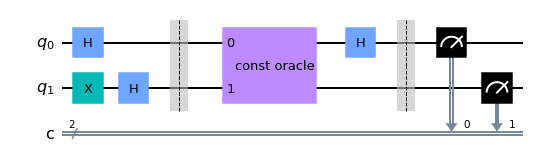

In [5]:
# main circuit - deutch's algorithm:
qreg_q = QuantumRegister(2, 'q')
creg_c = ClassicalRegister(2, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)

circuit.x(qreg_q[1])
circuit.h(qreg_q[0])
circuit.h(qreg_q[1])
    
circuit.barrier()

circuit.append(constant_oracle_circuit, [qreg_q[0],qreg_q[1]])
# circuit.append(balanced_oracle_circuit, [qreg_q[0],qreg_q[1]])

circuit.h(qreg_q[0])
# circuit.h(qreg_q[1])

circuit.barrier()

circuit.measure(qreg_q[0], creg_c[0])
circuit.measure(qreg_q[1], creg_c[1])

circuit.draw()

In [6]:
# Print state vector
from qiskit.quantum_info import Statevector

# Set the intial state of the simulator to the ground state using from_int
state = Statevector.from_int(0, 2**n)

# Evolve the state by the quantum circuit
# state = state.evolve(circuit)

# #draw using latex
# state.draw('latex')

/opt/conda/lib/python3.8/site-packages/qiskit/visualization/bloch.py:69: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  x_s, y_s, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


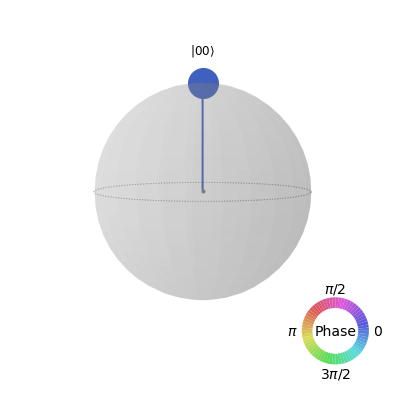

In [7]:
state.draw('qsphere')

In [8]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_multivector
%matplotlib inline

# state = Statevector.from_instruction(circuit)
# plot_bloch_multivector(state, title="New Bloch Multivector", reverse_bits=False)

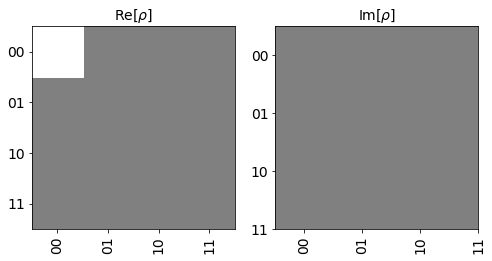

In [9]:
state.draw('hinton')

In [10]:
# use local simulator - can't run simlation because of inner gates
# aer_sim = Aer.get_backend('aer_simulator')
# shots = 1024
# qobj = assemble(circuit, aer_sim)
# results = aer_sim.run(qobj).result()
# answer = results.get_counts()

# plot_histogram(answer)

/opt/conda/lib/python3.8/site-packages/qiskit/utils/deprecation.py:62: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.9.0 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  return func(*args, **kwargs)
Simulation failed and returned the following error message:
ERROR:  [Experiment 0] Circuit circuit-14 contains invalid instructions {"gates": {const oracle}} for "statevector" method.


Traceback (most recent call last):
  File "/tmp/ipykernel_357/168836303.py", line 6, in <module>
    answer = results.get_counts()
  File "/opt/conda/lib/python3.8/site-packages/qiskit/result/result.py", line 280, in get_counts
    exp = self._get_experiment(key)
  File "/opt/conda/lib/python3.8/site-packages/qiskit/result/result.py", line 409, in _get_experiment
    raise QiskitError(result_status, ", ", exp_status)
QiskitError: 'ERROR:  [Experiment 0] Circuit circuit-14 contains invalid instructions {"gates": {const oracle}} for "statevector" method. ,  ERROR: Circuit circuit-14 contains invalid instructions {"gates": {const oracle}} for "statevector" method.'

Use %tb to get the full traceback.


In [11]:
# Load our saved IBMQ accounts and get the least busy backend device with greater than or equal to (n+1) qubits
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q')
backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= (n) and
                                   not x.configuration().simulator and x.status().operational==True))
print("least busy backend: ", backend)

least busy backend:  ibmq_belem


In [12]:
# Run our circuit on the least busy backend. Monitor the execution of the job in the queue
from qiskit.tools.monitor import job_monitor

shots = 1024
transpiled_circuit = transpile(circuit, backend, optimization_level=0)
# job = backend.run(transpiled_circuit)
# job_monitor(job, interval=2)